In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sehwag = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Datasets\sehwag.csv')
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,01-Apr-99,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14-Dec-00,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25-Mar-01,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27-Jun-01,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30-Jun-01,ODI # 1731


In [4]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

In [12]:
# calculating percentile for each quartile
p_25 = np.percentile(sehwag["Runs"], 25)
p_50 = np.percentile(sehwag["Runs"], 50)
p_75 = np.percentile(sehwag["Runs"], 75)
avg_runs = sehwag['Runs'].mean()
print(f'25th percentile is {p_25}\n50th percentile (median) is {p_50}\n75th percentile is {p_75}\nAverage of all runs is {avg_runs}')

25th percentile is 8.0
50th percentile (median) is 23.0
75th percentile is 46.0
Average of all runs is 33.76734693877551


insight: more than 50% of the time, Sehwag scores in the range of 38 runs<br>
however since average runs is very far from median, there are outliers seen on higher side of runs

In [ ]:
iqr_sehwag = p_75 - p_25                                            # IQR = Q3-Q1
normal_range = (sehwag["Runs"].max() - sehwag["Runs"].min())
print(f'IQR is {iqr_sehwag}\nrange of runs is {normal_range}')

IQR is 38.0
range of runs is 219


insight: there are outliers in data as Range is very far from IQR

<Axes: xlabel='Runs'>

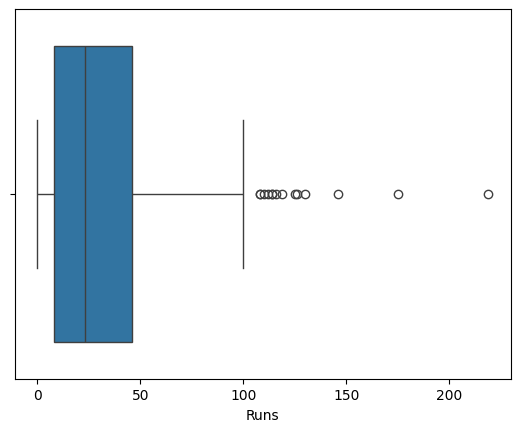

In [13]:
sns.boxplot(data=sehwag["Runs"], orient="h")                        # plotting the runs horizontally

In [ ]:
lower = p_25 - 1.5*(iqr_sehwag)                                   # lower limit = Q1 - 1.5 * IQR
upper = p_75 + 1.5*(iqr_sehwag)                                   # upper limit = Q3 + 1.5 * IQR
print(f'lower limit {lower}\nUpper limit {upper}')

lower limit 49.0
Upper limit 103.0


discarding the lower limit value as runs scored cannot be negative

In [22]:
outliers_sehwag = sehwag[sehwag["Runs"]>upper]                   # all the values greater than upper is outlier
outlier_perc = round(len(outliers_sehwag)/len(sehwag)*100,2)
print(f'There are {outlier_perc}% of outlier values wrt the runs feature')

There are 5.71% of outlier values wrt the runs feature


<font color='orange'>**Conclusion**:</font>

Here we can observe that **5.7% values from the dataset are outliers**.  

This means we can conclude that <font color='purple'>5.7 or ~6% times Sehwag has scored more than the IQR which is 38 runs</font>
